<a href="https://colab.research.google.com/github/Madeira-International-Workshop-in-ML/2022_day_2/blob/main/Image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries and dataset
import numpy as np
from keras.utils import np_utils
from keras.datasets import fashion_mnist
import tensorflow as tf
import random as rd
tf.device('gpu')

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

%matplotlib inline
import matplotlib.pyplot as plt



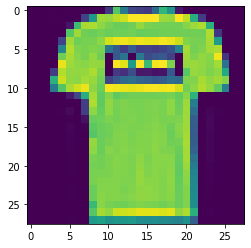

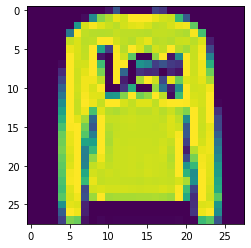

In [ ]:
# Showing an example of the training sample
plt.imshow(X_train[1,:,:])
plt.show()

# Showing an example of the testing sample
plt.imshow(X_test[1,:,:])
plt.show()


In [ ]:
# converting training and testing samples to float for pixels normalization

#Converting pixel values to floating points for all training and testing samples
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

# Dividing the training and testing samples by 255 for normalization
X_train/=255.0
X_test/=255.0

# Adding an extra dimension to feed to a 2D neural network model
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Converting labels to one hot encoders
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
# Defining layers used in the network (convolution, maxpooling, flatten, Dense and Dropout)
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

In [ ]:
#Defining the model architecture
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128))
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

# Model Compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Training
model.fit(X_train, y_train, batch_size=32,epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6627 - accuracy: 0.7501 - val_loss: 0.4436 - val_accuracy: 0.8345
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4727 - accuracy: 0.8269 - val_loss: 0.4099 - val_accuracy: 0.8481
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4337 - accuracy: 0.8386 - val_loss: 0.3992 - val_accuracy: 0.8523
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4097 - accuracy: 0.8479 - val_loss: 0.3607 - val_accuracy: 0.8655
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3936 - accuracy: 0.8543 - val_loss: 0.3735 - val_accuracy: 0.8649
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3794 - accuracy: 0.8593 - val_loss: 0.3602 - val_accuracy: 0.8633
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3688 - accuracy: 0.8629 - val_loss: 0.3377 - val_ac

In [ ]:
print('Test accuracy:', model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.8797
Test accuracy: [0.33348116278648376, 0.8797000050544739]


** Model Training and Testing with Image Augmentation**

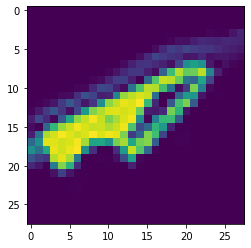

In [ ]:
# Image Generators for image augmentations. For this particular example, we have used image rotation, horizontal and vertical flip along with width and height shift range
from keras.preprocessing.image import ImageDataGenerator

#Data Augmentation
datagen = ImageDataGenerator(
    
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,  
    zca_whitening=False,
    rotation_range=50,
    width_shift_range=0.01, 
    height_shift_range=0.01, 
    horizontal_flip=True, 
    vertical_flip=True)

# Model Training with augmentation
datagen.fit(X_train)

# Showing an example of the augmented data (Rotated image)
gen = datagen.flow(X_train, batch_size=1)
plt.imshow(gen.next().squeeze())
plt.show()


In [ ]:
model.fit(X_train, y_train, batch_size=32,epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2956 - accuracy: 0.8906 - val_loss: 0.3076 - val_accuracy: 0.8893
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2959 - accuracy: 0.8912 - val_loss: 0.3201 - val_accuracy: 0.8830
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2944 - accuracy: 0.8921 - val_loss: 0.3071 - val_accuracy: 0.8896
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2938 - accuracy: 0.8929 - val_loss: 0.2978 - val_accuracy: 0.8929
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2901 - accuracy: 0.8937 - val_loss: 0.3104 - val_accuracy: 0.8869
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2887 - accuracy: 0.8935 - val_loss: 0.3044 - val_accuracy: 0.8879
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2836 - accuracy: 0.8966 - val_loss: 0.2965 - val_ac

In [ ]:
print('Test accuracy:', model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.3119 - accuracy: 0.8858
Test accuracy: [0.31192725896835327, 0.8858000040054321]
